In [286]:
#Importan las librerias necesarias
from qutip import *
import qutip as qt

import numpy as np
import matplotlib.pyplot as plt

In [287]:
from scipy.signal import find_peaks

# MATRICES DE PAULI

Opción 1: Puedo reconstruir las matrices de Pauli, tal que la suma de ellas arroje como resultado el respectivo operador colectivo.

In [288]:
n=3

sigma1=[ [1,0,0,0],
        [0,1,0,0],
        [0,0,-1,0],
        [0,0,0,-1]
    
    ]
sigma1=Qobj(sigma1)
sigma1


sigma2=sigma1.copy()
sigma2


sigma3=[ [1,0,0,0],
        [0,-1,0,0],
        [0,0,1,0],
        [0,0,0,-1]
    
    ]
sigma3=Qobj(sigma3)



(sigma3+sigma2+sigma1)*0.5
# jmat(3/2,'z')

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -1.5]]

In [289]:
#Operador jmat(j,'z'), con n=6, i.e, j=3

s1=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,1,0],[0,0,0,0,0,0,-1]]
s1=Qobj(s1)

s2=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,1,0,0],[0,0,0,0,0,-1,0],[0,0,0,0,0,0,-1]]
s2=Qobj(s2)

s3=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,1,0,0,0],[0,0,0,0,-1,0,0],[0,0,0,0,0,-1,0],[0,0,0,0,0,0,-1]]
s3=Qobj(s3)

s4=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,1,0,0,0,0],[0,0,0,-1,0,0,0],[0,0,0,0,-1,0,0],[0,0,0,0,0,-1,0],[0,0,0,0,0,0,-1]]
s4=Qobj(s4)

s5=[[1,0,0,0,0,0,0],[0,1,0,0,0,0,0],[0,0,-1,0,0,0,0],[0,0,0,-1,0,0,0],[0,0,0,0,-1,0,0],[0,0,0,0,0,-1,0],[0,0,0,0,0,0,-1]]
s5=Qobj(s5)

s6=[[1,0,0,0,0,0,0],[0,-1,0,0,0,0,0],[0,0,-1,0,0,0,0],[0,0,0,-1,0,0,0],[0,0,0,0,-1,0,0],[0,0,0,0,0,-1,0],[0,0,0,0,0,0,-1]]
s6=Qobj(s6)



(s1+s2+s3+s4+s5+s6)*0.5
# jmat(3,'z')

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[ 3.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  0.]
 [ 0.  0.  0.  0.  0.  0. -3.]]

In [290]:
# n=10

z1= np.array(identity(n+1))
z1[n:]=-1*z1[n:]
z1=Qobj(z1)

z2= np.array(identity(n+1))
z2[n-1:]=-1*z2[n-1:]
z2=Qobj(z2)


z3= np.array(identity(n+1))
z3[n-2:]=-1*z3[n-2:]
z3=Qobj(z3)

z4= np.array(identity(n+1))
z4[n-3:]=-1*z4[n-3:]
z4=Qobj(z4)

z5= np.array(identity(n+1))
z5[n-4:]=-1*z5[n-4:]
z5=Qobj(z5)

z6= np.array(identity(n+1))
z6[n-5:]=-1*z6[n-5:]
z6=Qobj(z6)

z7= np.array(identity(n+1))
z7[n-6:]=-1*z7[n-6:]
z7=Qobj(z7)

z8= np.array(identity(n+1))
z8[n-7:]=-1*z8[n-7:]
z8=Qobj(z8)


z9= np.array(identity(n+1))
z9[n-8:]=-1*z9[n-8:]
z9=Qobj(z9)


z10= np.array(identity(n+1))
z10[n-9:]=-1*z10[n-9:]
z10=Qobj(z10)


jjj=(z1+z2+z3+z4+z5+z6+z7+z8+z9+z10)*0.5
jjj

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -3.  0.]
 [ 0.  0.  0. -5.]]

# Hamiltoniano with the 'rare' method

The big deal with the above implementation is that I don't have a way for label the $\mu$ Pauli Matrices, for each emisor. And If I change any of them, so the result is different enough.

In [291]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=3

#Momentum angular total
j=n/2

# #Proyección de j
# m=-j

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
Br=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=Br/((n)**(1/2))


#Operadores del sistema


#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))








#interaccion Ising


# n=3
parametro12=1
parametro23=1
Hising3= parametro12*tensor(sigma1*sigma2, identity(N))+ parametro23*tensor(sigma2*sigma3, identity(N))


#n=6
p12=1
p23=1
p34=1
p45=1
p56=1
Hising642=p12*tensor(s1*s4,identity(N))+ p23*tensor(s4*s3,identity(N)) + p34*tensor(s3*s2,identity(N)) +p45*tensor(s2*s5,identity(N))+p56*tensor(s5*s6,identity(N))
Hising622=p12*tensor(s1*s2,identity(N))+ p23*tensor(s2*s3,identity(N)) + p34*tensor(s3*s4,identity(N)) +p45*tensor(s4*s5,identity(N))+p56*tensor(s5*s6,identity(N))


# n=10
pz12=1
pz23=1
pz34=1
pz45=1
pz56=1
pz67=1
pz78=1
pz89=1
pz910=1
Hising101= pz12*tensor(z1*z2,identity(N))+ pz23*tensor(z2*z3,identity(N))+ pz34*tensor(z3*z4,identity(N))+ pz45*tensor(z4*z5,identity(N))+pz56*tensor(z5*z6,identity(N))
Hising102= pz67*tensor(z6*z7,identity(N))+ pz78*tensor(z7*z8,identity(N))+ pz89*tensor(z8*z9,identity(N))+ pz910*tensor(z9*z10,identity(N))


# #Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax) + Hising3
# htc

# Collective angular operator

Now, my number two option is build the $J_\mu$ from scratch (how theory says).
For now, the problem with this implementation is the initial state.

In [297]:
#parameters for comparison

#Number of Photon
N=4
#Number of emisors
n=3
#Total collective angular magnitude
j=0.5*n

# -------------------------------------------------------
#Z Pauli Matrices
sz=sigmaz()
sp=sigmap()
sm=sigmam()

# -------------------------------------------------------
#Operators for each two level qubit

#For z 
qz1=tensor(sz,identity(2),identity(2))
qz1

qz2=tensor(identity(2),sz,identity(2))
qz2

qz3=tensor(identity(2),identity(2),sz)
qz3

# # according to the theory, the operator below is the correct:
Jz=0.5*(qz1+qz2+qz3)
Jz
# -------------------------------------------------------------------
#For +

qp1=tensor(sp,identity(2),identity(2))
qp1

qp2=tensor(identity(2),sp,identity(2))
qp2

qp3=tensor(identity(2),identity(2),sp)
qp3


Jp=0.5*(qp1+qp2+qp3)
# -------------------------------------------------------------------
#For -

qm1=tensor(sm,identity(2),identity(2))
qm1

qm2=tensor(identity(2),sm,identity(2))
qm2

qm3=tensor(identity(2),identity(2),sm)
qm3


Jm=0.5*(qm1+qm2+qm3)
# -------------------------------------------------------------------
#Anihilation operator with the correct dimension
A=tensor(identity(Jz.dims[0:1][0]),destroy(N))

#Collective angular operators
Jz=tensor(Jz, identity(N))
Jm=tensor(Jm, identity(N))
Jp=tensor(Jp, identity(N))

#---------------------------------------------------------------------
# Parámetros

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
Br=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=Br/((n)**(1/2))
#---------------------------------------------------------------------
#Hamiltoniano

HTC=wa*Jz + wc*A.dag()*A  + g*(A.dag()*Jm + A*Jp)
# HTC

# Original method

Esta implementación es la que logra reproducir los resultados del artículo

In [296]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=3

#Momentum angular total
j=n/2

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
Br=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=Br/((n)**(1/2))

#---------------------------------------------------------------------------
#Operadores del sistema

#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))




# #Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)
htc

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.5         0.          0.          0.          0.          0.1
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.5         0.          0.          0.          0.
   0.14142136  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          3.5         0.          0.          0.
   0.          0.17320508  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          4.5         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.5         0.
   0.          0.          0.          0.11547005  0.          0.
   0.          0.          0.        

# Estados

Para encontrar aquel autovector para el cual M=-J, podemos ver cuál es el autovalor que satisface esto. Para ello los siguientes comandos resultan útiles.

In [362]:
# Jz.groundstate()
# eigenvalues, eigenstates = jz.eigenstates()

## Estados fotónicos

In [363]:
#Estados para la parte fotónica

#|0> Estado base fotónico
p0=qt.fock(N,0) 

#|1> Primer modo de excitación
p1=qt.fock(N,1) 

# |2> Segundo modo de excitación
p2=qt.fock(N,2) 

# |3> Tercer modo de excitación
p3=qt.fock(N,3) 

## Estados materiales para 'Original Method' and 'the 'rare' method'

In [364]:
#Estados para la parte de materia...Aquí estoy usando un estado diferente de Dicke. Estoy usando un marco de 
#Fock para los estados de Dicke. Necesito el estado de Dicke para crear una condición inicial (estado inicial)
#para resolver el Hamiltoniano...

#|3> 'Máximo estado exitado'
d0=qt.basis(int(2*j+1), 0, 0)

#|2> 'penúltimo estado exitado de la materia'
d1=qt.basis(int(2*j+1), 1, 0)


d2=qt.basis(int(2*j+1), 2, 0)

# |0>  'Estado base de la materia'
d3=qt.basis(int(2*j+1), n, 0)
d3

# jz.eigenstates() esta línea muestra que d3 es la correcta elección para el estado base de los emisores

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]]

In [365]:
#Coeficientes de la...
n0=((2)**(1/2))/3
n3=((7)**(1/2))/3
#...condicion inicial

star=n0*p0+n3*p3

#Pero este tiene a los emisores en sus estados excitados, y es el que reproduce las gráficas más pare
#cidas al artículo. 
initial=tensor(d3,star)
initial

Quantum object: dims = [[4, 4], [1, 1]], shape = (16, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.47140452]
 [0.        ]
 [0.        ]
 [0.8819171 ]]

# Ecuación de Schrodinger para estos dos métodos

In [366]:
B=3000
#Tiempo en el que evoluciona el sistema
tlist=np.linspace(start=0,stop=B,num=B)

#Solución de la ecuación de Schrödinger
resultado=sesolve(htc, initial, tlist, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)

#Forma de acceder a los estados del sistema
resultado.states

#El número de estados que surgen, corresponde al numero num
#ya que son los 'puntos' que se toman del lapso. En cada punto, se conocen 
#los estados del sistema.
len(resultado.states)

3000

# Matriz de Densidad para los dos métodos

In [367]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

#Esta sería la matriz de densidad del estado 59
rho(B-1)

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 6.34941636e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  6.42742473e-05-6.01375452e-02j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   2.73435176e-01+4.03731254e-04j  0.00000000e+00+0.00000000e+00j
   2.30091602e-01-2.96870180e-01j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  6.39774432e-05-1.11055008e-01j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.000000

# Matrices de densidad

In [368]:
# ptrace(partematerial=0)
rho(0).ptrace(0)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

In [369]:
# ptrace(fotónica=1)
rho(0).ptrace(1)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.22222222 0.         0.         0.41573971]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.41573971 0.         0.         0.77777778]]

# Estados materiales para 'collective angular operator'

In [370]:
#Necesito el estado 4°
(0.5*(qz1+qz2+qz3)).eigenstates() 


#Esta es una forma de encontrar ese estado 4°
d3n=qt.basis(2, 1, 0)
D3=tensor(d3n,d3n,d3n)
D3

Quantum object: dims = [[2, 2, 2], [1, 1, 1]], shape = (8, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [371]:
#Estado inicial para este método
star=n0*p0+n3*p3
initial=tensor(D3,star)
initial

Quantum object: dims = [[2, 2, 2, 4], [1, 1, 1, 1]], shape = (32, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.47140452]
 [0.        ]
 [0.        ]
 [0.8819171 ]]

# Ecuación de Schrodinger

In [372]:
B=3000
#Tiempo en el que evoluciona el sistema
tlist=np.linspace(start=0,stop=B,num=B)

#Solución de la ecuación de Schrödinger
resultado=sesolve(HTC, initial, tlist, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)

#Forma de acceder a los estados del sistema
resultado.states

#El número de estados que surgen, corresponde al numero num
#ya que son los 'puntos' que se toman del lapso. En cada punto, se conocen 
#los estados del sistema.
len(resultado.states)

3000

# Matriz de densidad 

In [376]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

#Esta sería la matriz de densidad del estado 59
rho(B-1)
rho(0)

Quantum object: dims = [[2, 2, 2, 4], [2, 2, 2, 4]], shape = (32, 32), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.77777778]]

# Trazas Parciales

In [380]:
# ptrace(partematerial=0)
rho(0).ptrace(0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [378]:
# ptrace(partefotónica=1)
rho(0).ptrace(1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

# Entropía Lineal

In [269]:
def entropia (x):
    "Entropía lineal usando un ket"
    rho(x)
    return(entropy_linear(rho(x).ptrace(0)))


#Entropía lineal para el estado 0, es decir: t=0
entropia(0)

0.0

# Grafica de Entropía Lineal

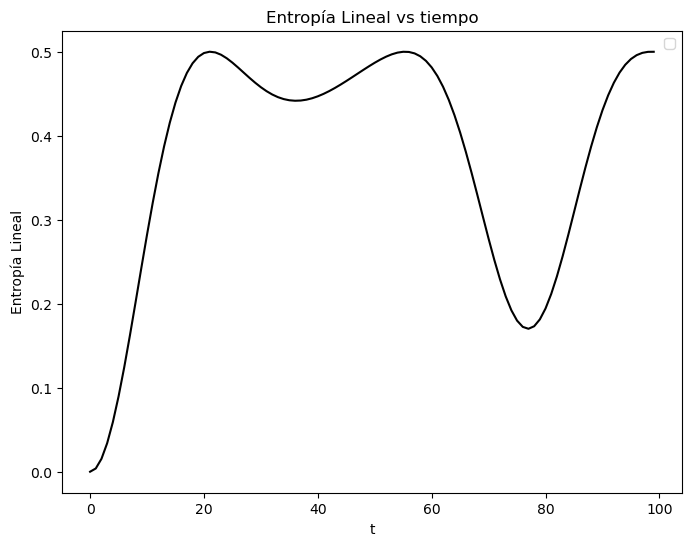

In [270]:
# Este es el  espacio donde se va a dinujar la gráfica

#El eje x va desde 0 hasta 365
x_vals=[i for i in range(100)]

#Se evalúan los valores de la entropía lineal para todos los valores de x
#valores de entropía lineal para el estado x
y1_vals=[]

for i in range(len(x_vals)):
    y1_vals.append(entropia(i))
    

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, linestyle='-', color='black')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Función de Correlación de Segundo Orden

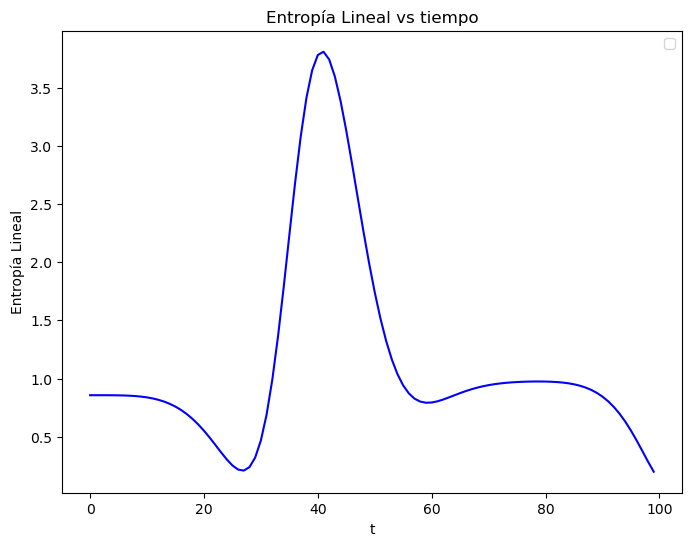

In [271]:
#operadores para crear la función de correlacion óptica de segundo orden
# up=a.dag()*a.dag()*a*a
# down=a.dag()*a

up=A.dag()*A.dag()*A*A
down=A.dag()*A

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

#x es un valor menor a num, que corresponde al valor del eje x de la grafica
x_vals=[i for i in range(100)]

#Valores de función de correlacion de segundo orden para el estado x
y2_vals=[]

for i in range(len(x_vals)):
    y2_vals.append(correlacion(i))
    
# Graficar los valores de x e y
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y2_vals, linestyle='-', color='b')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Ambas Gráficas Superpuestas

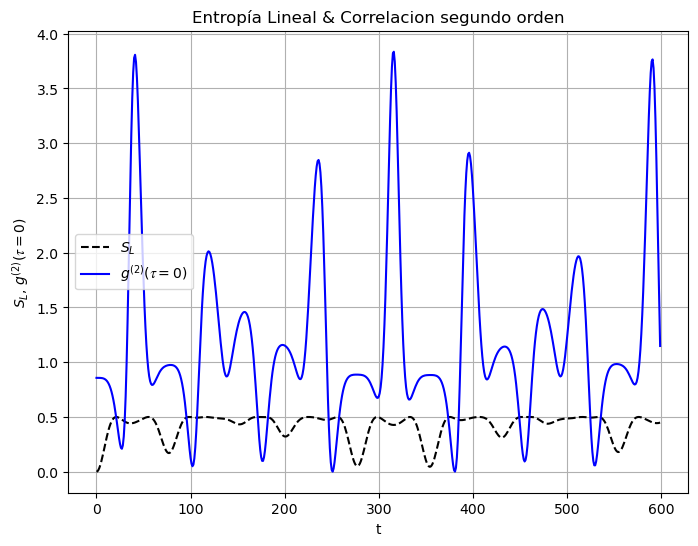

<class 'list'>


In [272]:
def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(type(x_vals))
    
    
    
# entropiaycorrelacion(310) 310 para el caso 1.
# entropiaycorrelacion(900)
# entropiaycorrelacion(2900)
entropiaycorrelacion(600)

# Puntos Importantes

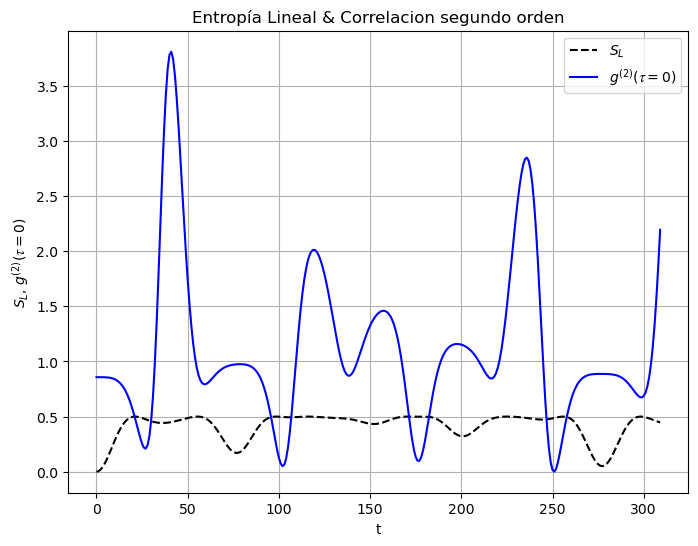

<class 'list'>


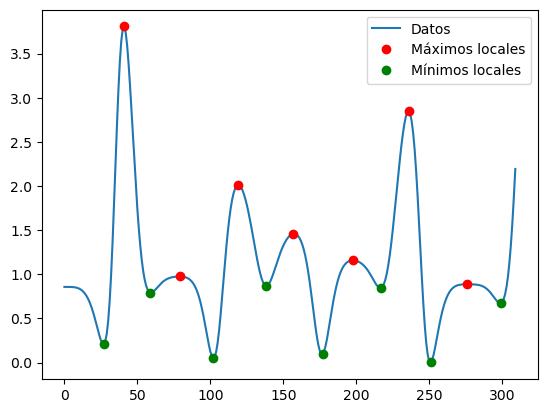

Los primeros 6 puntos críticos de la entropía lineal son:  [0, 27, 41, 59, 79, 102]


In [273]:
Puntos=[]



def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(type(x_vals))
    
    

    #Forma de encontrar los máximos y mínimos locales de la gráfica.
    #Es indispensable que para que funcione las listas deben ser un array de numpy.
    x = np.array(x_vals)
    y = np.array(y2_vals)

    # Encuentra los máximos locales
    peaks, _ = find_peaks(y)
    # Encuentra los mínimos locales invirtiendo los datos
    min_peaks, _ = find_peaks(-y)

    # Grafica los datos
    plt.plot(x, y, label='Datos')
    # Marca los máximos locales
    plt.plot(x[peaks], y[peaks], 'ro', label='Máximos locales')
    # Marca los mínimos locales
    plt.plot(x[min_peaks], y[min_peaks], 'go', label='Mínimos locales')

    plt.legend()
    plt.show()
    
    
    # Manera de acceder a los máximos y mínimos
#     print(y[peaks],x[peaks], len(y[peaks]), len(x[peaks]))
    
    
    #Slicing de esas listas
    Wxmax=list(x[peaks][0:7])
    Wymax=list (y[peaks][0:7])
    
    Wxmin=list (x[min_peaks][0:7])
    Wymin=list (y[min_peaks][0:7])
    

  
   #Aquí lo que hago es unir los valores de x (el tiempo) para los puntos mínimos y máximos. Y con esos valores
    #específicos del tiempo puedo hacer las gráficas de Winger
    
    for i in range (len (Wxmax)):
        Wxmin.append(Wxmax[i])
    
    #Tengo que agregar el cero
    Wxmin.append(0)
    
    #Ordeno los tiempos
    Wxmin.sort()
    Puntos.append(Wxmin[0:6])
#     print('Puntos críticos: ', Wxmin[0:6])

        
    
# entropiaycorrelacion(310) 310 para el caso 1.
# entropiaycorrelacion(900)
# entropiaycorrelacion(2900)
entropiaycorrelacion(310)


#Esta es la lista de los puntos críticos (máximos y mínimos locales), en la entropía lineal.

Puntoscriticos=Puntos[0]


print('Los primeros 6 puntos críticos de la entropía lineal son: ', Puntoscriticos)

# Gráficas secundarias

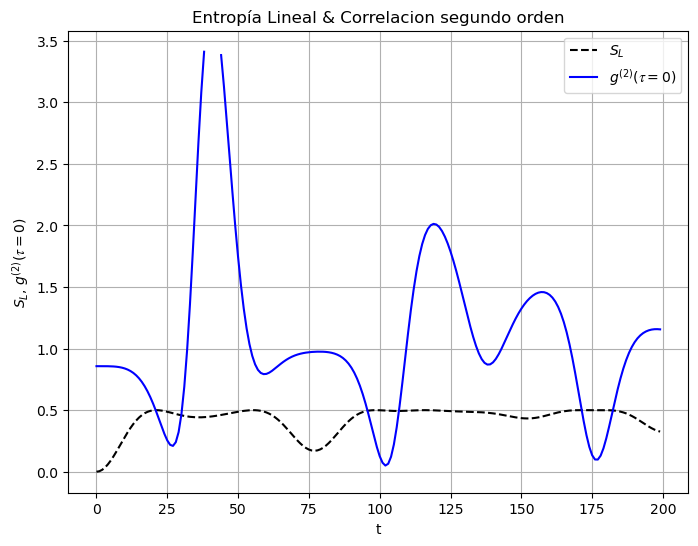

In [274]:
def secundarias (periodo, límite):
    #Gráfica para valores menores de 1
    
    x_vals=[i for i in range(periodo)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        
        
        
        
    for i in range(len(y2_vals)): 
        if y2_vals[i]>=límite:
            y2_vals[i]=np.nan
        
    
    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()

#Para aquirir esta gráfica muy bien, hay que jugar con el linspace que soluciona la ecuación de Schrödinger. 
secundarias(200,3.50)

# Función de Wigner

tuple

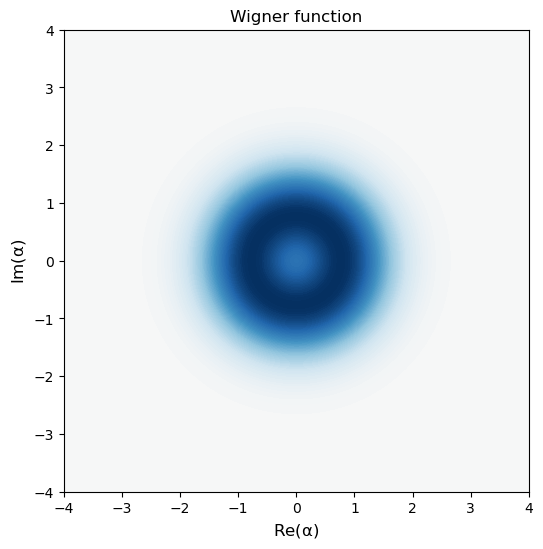

In [275]:
#Función de Wigner Fotónica
r=plot_wigner(rho(30).ptrace(1), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=4, colorbar=False, method='clenshaw', projection='2d')

type(r)

# Función de Wigner-Fotónica

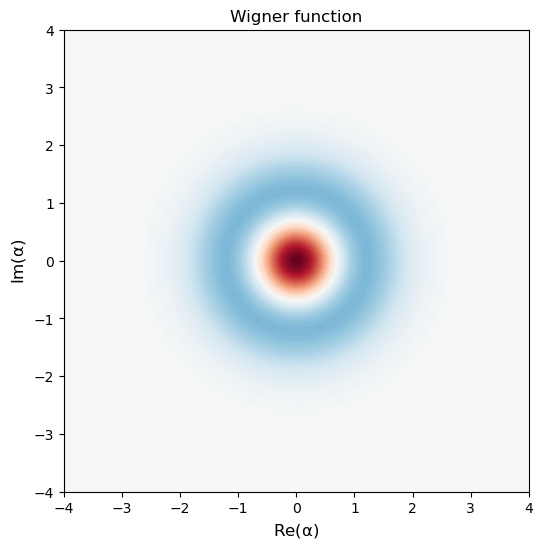

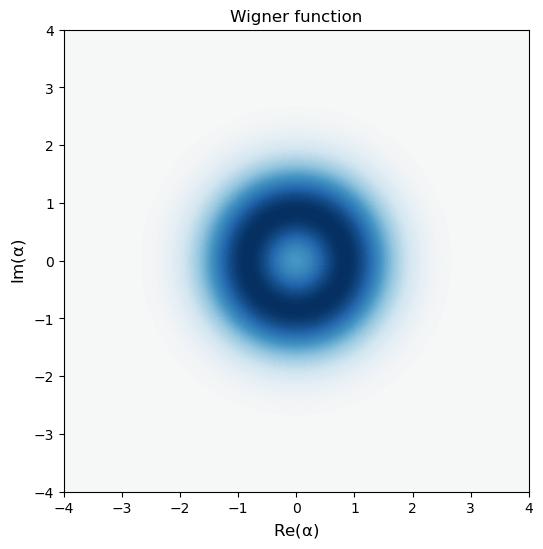

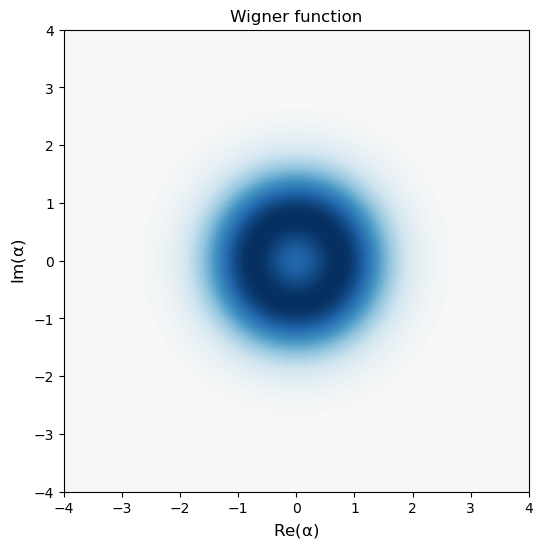

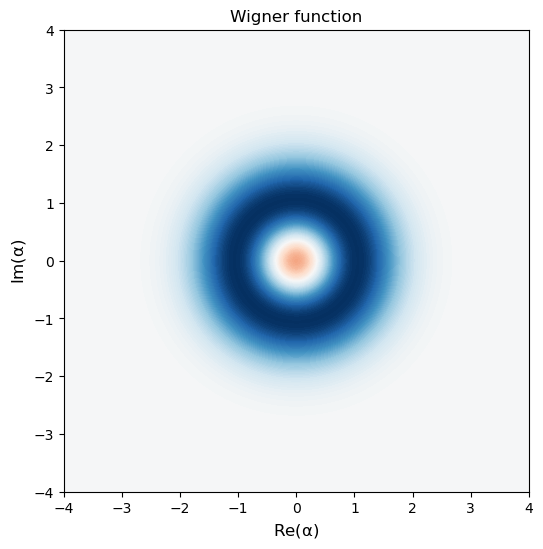

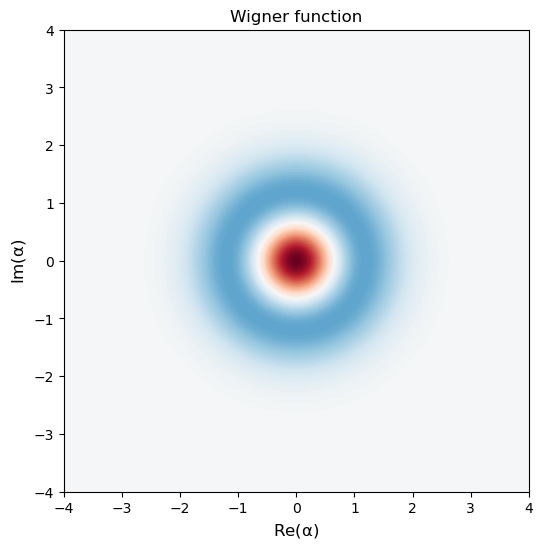

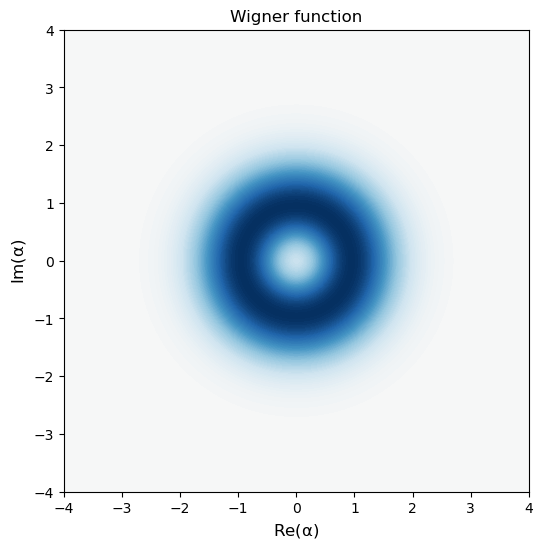

In [276]:
for i in range(len(Puntoscriticos)):
    plot_wigner(rho(Puntoscriticos[i]).ptrace(1), fig=None, ax=None, figsize=(6, 6), cmap=None, alpha_max=4, colorbar=False, method='clenshaw', projection='2d')

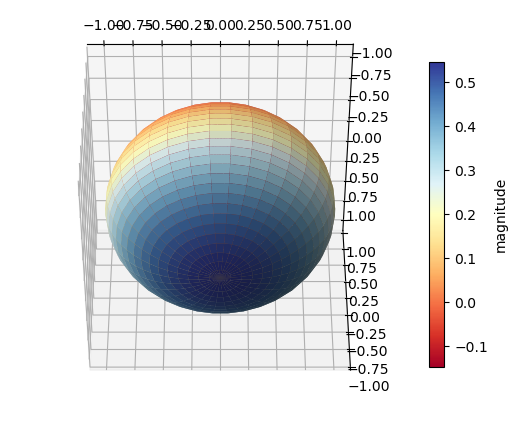

In [277]:
# Función de Wigner de Materia

psi=rho(0).ptrace(0)
theta = np.linspace(0, np.pi, 35)
phi = np.linspace(0, 2 * np.pi, 35)

W, THETA, PHI = spin_wigner(psi, theta, phi)


fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1, 2, 2, projection='3d')
f2, a2 = plot_spin_distribution_3d(W.real, THETA, PHI, fig=fig, ax=ax)
ax.view_init(-45, -90)

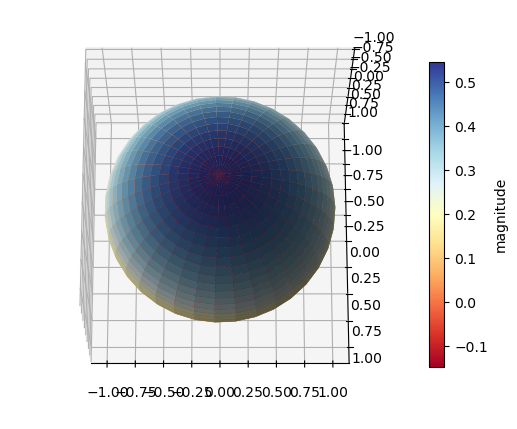

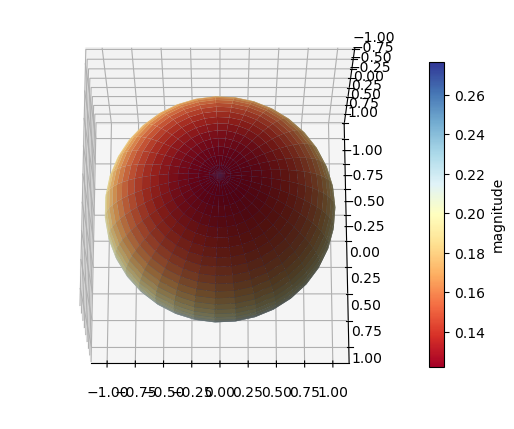

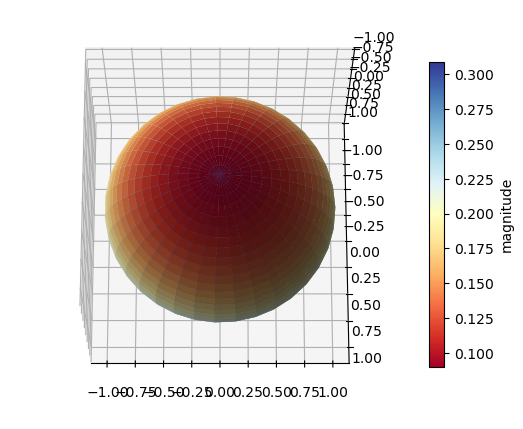

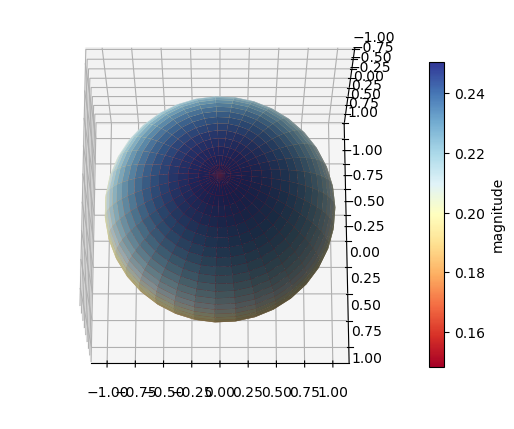

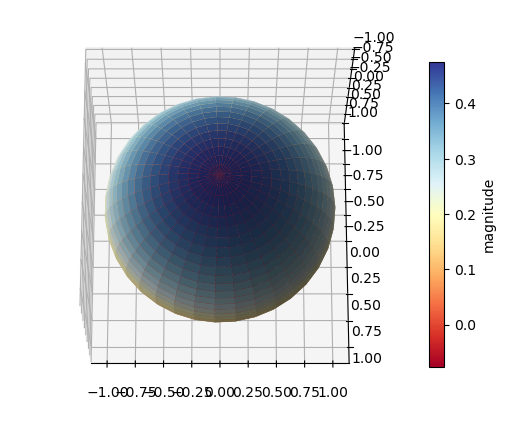

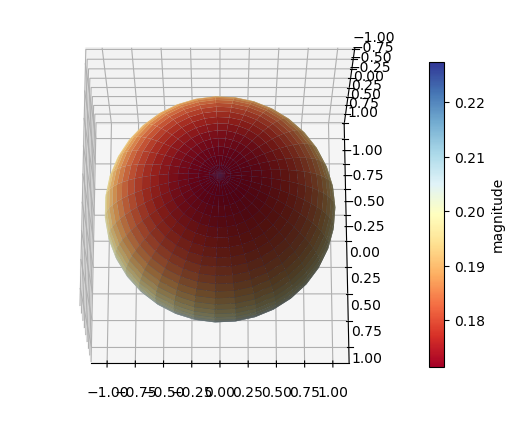

In [278]:
for i in range(len(Puntoscriticos)):
    # Función de Wigner de Materia

    psi=rho(Puntoscriticos[i]).ptrace(0)
    theta = np.linspace(0, np.pi, 36)
    phi = np.linspace(0, 2 * np.pi, 36)

    W, THETA, PHI = spin_wigner(psi, theta, phi)


    fig = plt.figure(figsize=(14,6))

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    f2, a2 = plot_spin_distribution_3d(W, THETA, PHI, fig=fig, ax=ax)
    ax.view_init(-110, -90)

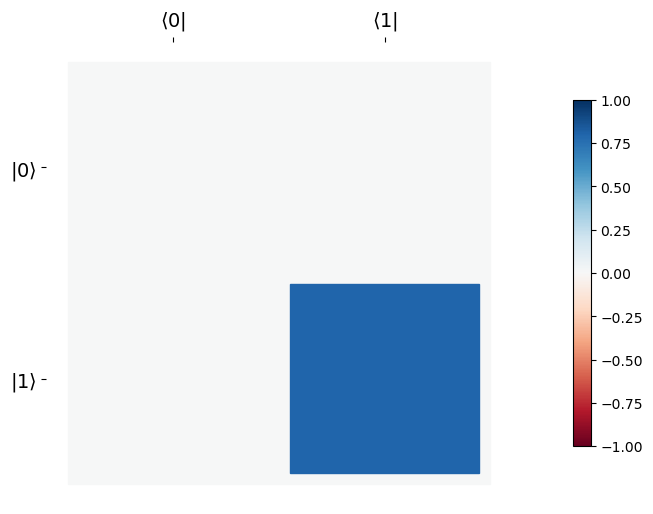

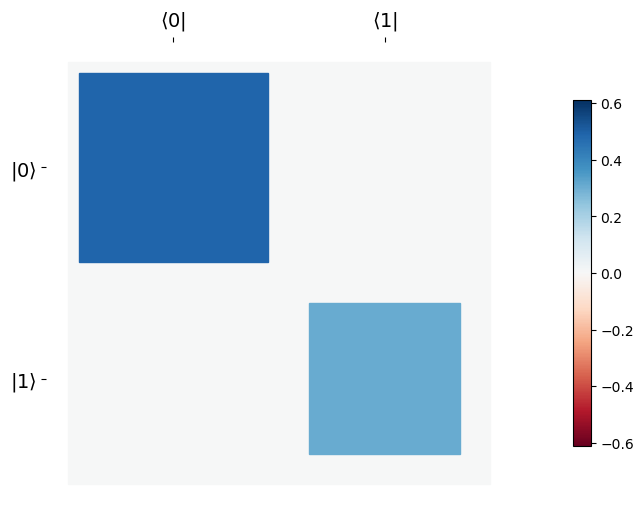

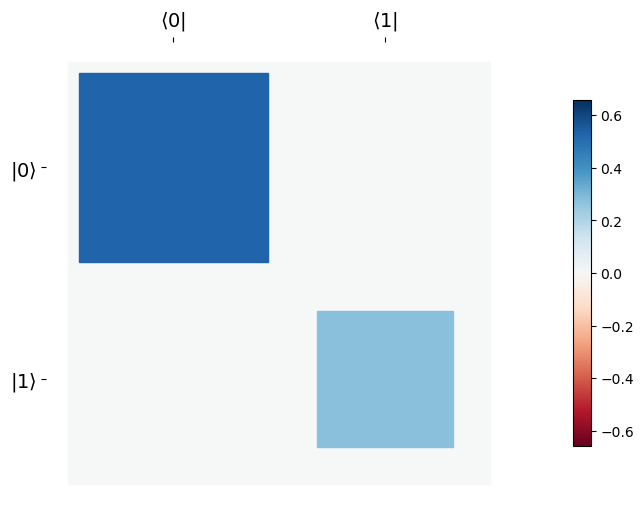

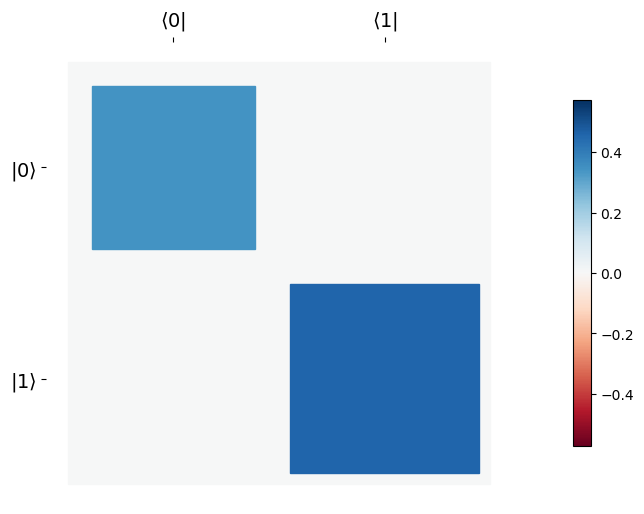

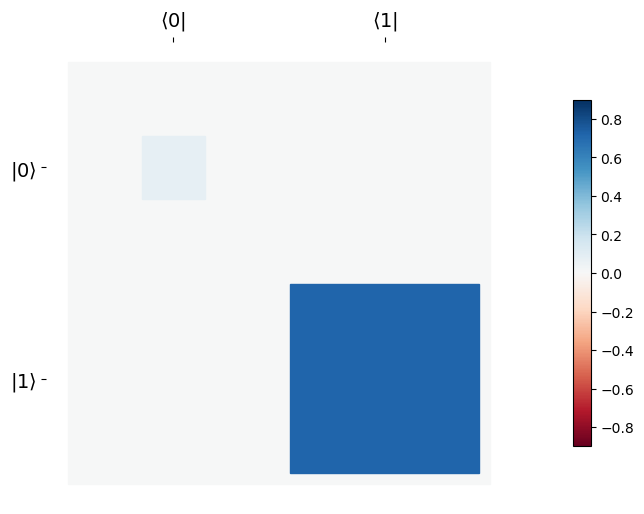

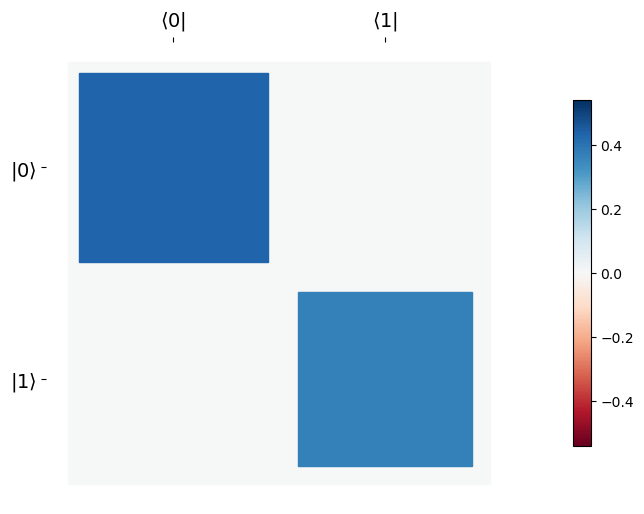

In [279]:
# Matriz de densidad para los fotones (ptrace(1))
# Matriz de densidad para la materia (ptrace(0))

for i in range(len(Puntoscriticos)):
    hinton(rho(Puntoscriticos[i]).ptrace(0))
    plt.show()

# Creando el correcto operador de momento angular

In [280]:
jz

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.5  0.  

In [281]:
r=[
    [j,0,0,0],
    [0,j-1,0,0],
    [0,0,-1*(j-1),0],
    [0,0,0,-1*j],
    
]

Qobj(r)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0. -2.]]

In [282]:
N=4
j=1/2*N
jmat(j,'z')

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 2.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -2.]]

Volviendo a hacer todo armando manualmente los operadores colectivos de momentum angular 

In [83]:
#parameters for comparison

N=4


n=3
j=0.5*n

#Z Pauli Matrices

sz=sigmaz()
sp=sigmap()
sm=sigmam()


    
#Operators for each two level qubit

#For z 

qz1=tensor(sz,identity(2),identity(2))
qz1

qz2=tensor(identity(2),sz,identity(2))
qz2

qz3=tensor(identity(2),identity(2),sz)
qz3

# # according to the theory, the operator below is the correct:
Jz=0.5* (qz1+qz2+qz3)
Jz

# -------------------------------------------------------------------

#For +


qp1=tensor(sp,identity(2),identity(2))
qp1

qp2=tensor(identity(2),sp,identity(2))
qp2

qp3=tensor(identity(2),identity(2),sp)
qp3


Jp=0.5* (qp1+qp2+qp3)


# -------------------------------------------------------------------

#For -

qm1=tensor(sm,identity(2),identity(2))
qm1

qm2=tensor(identity(2),sm,identity(2))
qm2

qm3=tensor(identity(2),identity(2),sm)
qm3


Jm=0.5* (qm1+qm2+qm3)


A=tensor(identity(Jz.dims[0:1][0]),destroy(N))

Jz=tensor(Jz, identity(N))
Jm=tensor(Jm, identity(N))
Jp=tensor(Jp, identity(N))


HTC=wa*Jz + wc*A.dag()*A  + g*(A.dag()*Jm + A*Jp)

Quantum object: dims = [[2, 2, 2, 4], [2, 2, 2, 4]], shape = (32, 32), type = oper, isherm = False
Qobj data =
[[ 0.          1.5         0.         ...  0.          0.
   0.        ]
 [ 0.          0.          2.12132034 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.         -2.12132034
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  -2.59807621]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]